In [1]:
import pandas as pd

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
test['Survived']='NaN'

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [5]:
data=pd.concat([test,train])

c:\users\bipin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298


In [7]:
data.Pclass = data['Pclass'].transform ( lambda x : 'First' if x==1 else 'Second' if x==2 else 'Third' if x==3 else None)

In [8]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,Third,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,Third,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,Second,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,Third,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,Third,female,1,NaN,3101298


In [9]:
data[['Survived','PassengerId','Pclass']].groupby('Pclass').count()

,Survived,PassengerId
Pclass,,
First,323,323
Second,277,277
Third,709,709


In [10]:
import numpy as np
pd.pivot_table(data[['PassengerId','Survived','Pclass']],index=['Survived'],columns='Pclass',aggfunc=len)

PassengerId             
Pclass         First Second Third
Survived                         
0                 80     97   372
1                136     87   119
NaN              107     93   218

In [14]:
psngr=pd.pivot_table(data[['PassengerId','Survived','Pclass','Sex']],index=['Survived'],columns=['Sex','Pclass'],aggfunc=len)

In [12]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


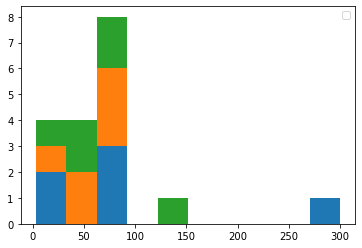

In [34]:
plt.hist(psngr['PassengerId'],histtype='barstacked')
plt.legend()